___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [208]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import clean_columns
import scipy.stats as stats

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

# ml algorithm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from sklearn.model_selection import cross_validate
from yellowbrick.model_selection import FeatureImportances
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from scipy.stats import skew


import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="latin-1")
df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")

In [3]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
df_f.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [5]:
df_f.Gender.value_counts()

Gender
Female    1986
Name: count, dtype: int64

In [7]:
df_f.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,22306.606244,229.651057,1335.095166,311.198389,215.739678,1239.029708,228.110272,182.05136,365.348943,305.578550,273.299597,450.324270,67.047835,311.012588,287.978852,133.765358,1021.247734,232.926989,833.742195,590.594663,485.120342,373.257805,1395.667170,269.329809,946.858006,247.40433,1171.636455,782.317221,620.840383,341.858006,33.220040,59.360524,20.391239,232.421954,747.686808,92.711984,246.293051,317.711984,264.081571,494.828298,439.862034,1044.284995,78.154079,186.550352,181.083082,147.768882,561.119839,189.819738,310.321249,67.162638,353.836858,398.961732,995.725076,617.076536,373.364048,395.708963,449.049345,511.286506,465.936556,62.748238,400.708459,113.094663,329.795569,371.162135,1309.736153,108.697382,388.199899,241.330312,1028.185297,334.297583,135.405337,856.625881,806.685297,543.552367,1660.286506,1628.473313,1329.688822,1056.256798,616.148540,167.86002,744.005035,437.767875,126.475327,845.350957,1559.409366,425.40282,299.894260,860.905337,213.030715,355.136455,980.149043,677.582075,154.792548,794.190332,35.072004,1.781470,28.943605,64.601712,147.505035
std,20

In [8]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [9]:
df_m.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [10]:
df_m.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,20003.370897,254.650906,1440.736894,335.244488,229.343949,1329.082068,252.017148,200.935081,415.675649,358.135718,275.433366,510.424792,74.784909,331.651396,315.713376,142.622244,1019.518863,245.849339,887.866732,617.953454,502.924792,392.260657,1517.299608,289.441450,1058.705537,253.847134,1291.118569,845.929936,622.343704,355.917442,36.062469,64.214601,23.174179,245.041646,804.513229,101.859138,271.178344,349.010289,310.058550,579.928466,480.213866,1130.153111,88.261391,212.283684,193.277805,154.330230,574.372856,199.504655,343.473297,72.505634,345.733219,379.297403,1061.629348,640.155561,430.853503,450.163155,488.388045,554.155561,491.658011,72.904459,409.287849,122.644292,397.648947,434.596031,1426.678589,116.455904,429.803528,267.882656,1178.587457,363.709946,149.776090,918.289809,895.847134,593.124449,1814.154336,1756.214601,1438.592112,1120.668545,625.142332,180.460314,811.925282,468.207006,131.146987,900.930671,1664.804263,477.612445,326.437286,940.577413,237.771436,387.642822,1056.485301,855.239588,175.916707,847.511514,8.973542,1.534052,30.158991,70.035767,188.00

In [11]:
df_f.shape

(1986, 108)

In [12]:
df_m.shape

(4082, 108)

In [13]:
df_f.columns = df_f.columns.str.lower()
df_m.columns = df_m.columns.str.lower()

In [14]:
data = pd.concat([df_f, df_m])
data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [15]:
data.shape

(6068, 108)

In [16]:
df = data.copy()

## Explore Data

In [17]:
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

#     df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
#     print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.
#     print(colored("Descriptive Statistics (Categorical Columns) \n", attrs=['bold']), df.describe(include=object).T,'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.


In [19]:
first_looking(df)

Shape:(6068, 108)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB
None
****************************************************************************************************
Number of Uniques:
subjectid                         6068
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc     

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [23]:
df['ethnicity']

0                              NaN
1                          Mexican
2                              NaN
3               Caribbean Islander
4                              NaN
                   ...            
4077    Blackfoot Cherokee Choctaw
4078                           NaN
4079                           NaN
4080                           NaN
4081                           NaN
Name: ethnicity, Length: 6068, dtype: object

In [24]:
df.ethnicity.isnull()

0        True
1       False
2        True
3       False
4        True
        ...  
4077    False
4078     True
4079     True
4080     True
4081     True
Name: ethnicity, Length: 6068, dtype: bool

In [25]:
df.drop("ethnicity", axis=1, inplace=True)

In [26]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [27]:
df["dodrace"] = df.dodrace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

<Axes: ylabel='component,dodrace'>

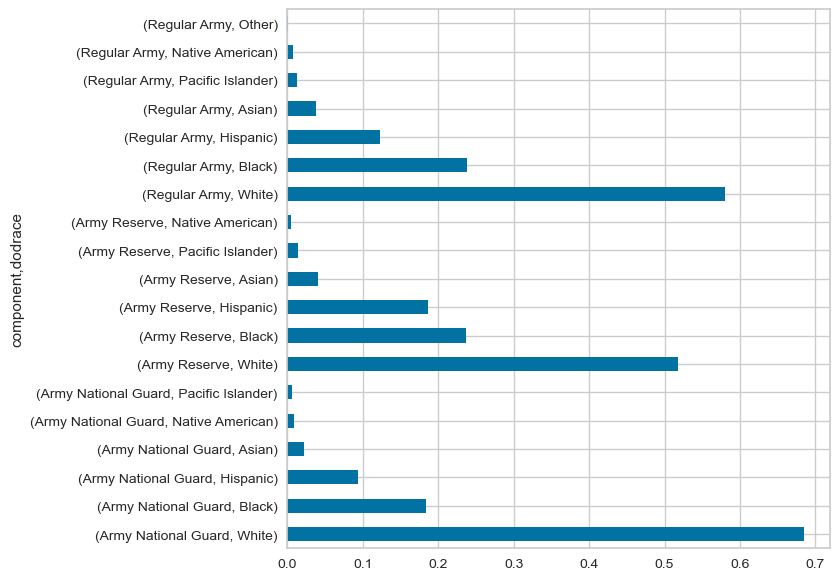

In [28]:
df.groupby(["component"])["dodrace"].value_counts(normalize = True).plot(kind="barh", figsize=(7,7))

In [29]:
df['component'].value_counts()

component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [30]:
df.branch

0               Combat Support
1       Combat Service Support
2       Combat Service Support
3       Combat Service Support
4                  Combat Arms
                 ...          
4077               Combat Arms
4078               Combat Arms
4079               Combat Arms
4080               Combat Arms
4081               Combat Arms
Name: branch, Length: 6068, dtype: object

<Axes: ylabel='branch,dodrace'>

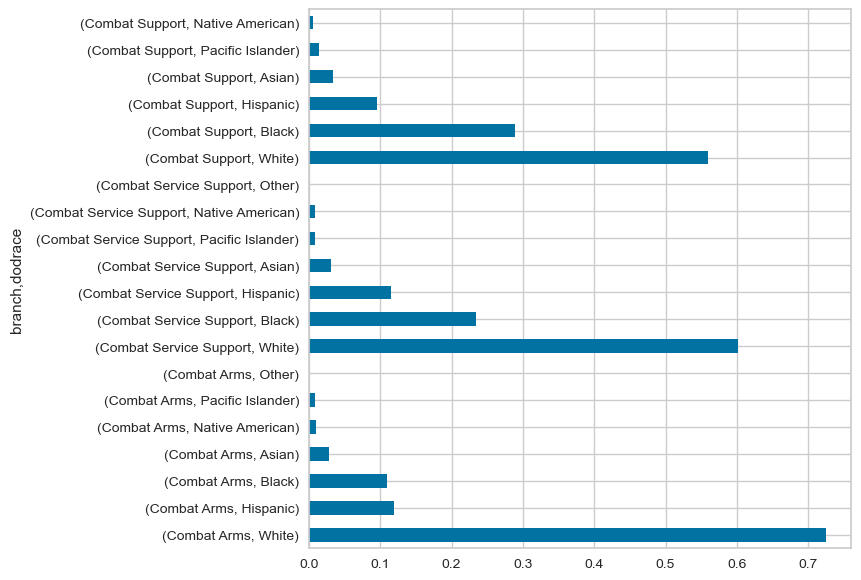

In [31]:
df.groupby(["branch"])["dodrace"].value_counts(normalize = True).plot(kind="barh", figsize=(7,7))

In [32]:
df.date

0       5-Oct-10
1       5-Oct-10
2       5-Oct-10
3       5-Oct-10
4       5-Oct-10
          ...   
4077    4-Apr-12
4078    4-Apr-12
4079    4-Apr-12
4080    4-Apr-12
4081    4-Apr-12
Name: date, Length: 6068, dtype: object

In [33]:
df.primarymos

0       92Y
1       25U
2       35D
3       25U
4       42A
       ... 
4077    11B
4078    91B
4079    13B
4080    13P
4081    92Y
Name: primarymos, Length: 6068, dtype: object

In [34]:
df.installation

0         Fort Hood
1         Fort Hood
2         Fort Hood
3         Fort Hood
4         Fort Hood
           ...     
4077    Camp Shelby
4078    Camp Shelby
4079    Camp Shelby
4080    Camp Shelby
4081    Camp Shelby
Name: installation, Length: 6068, dtype: object

In [35]:
df.drop(columns=["primarymos","component","branch","installation","date"],inplace=True)

In [36]:
print("First Shape:", df.shape)

df = df[df['subjectsbirthlocation'].map(df['subjectsbirthlocation'].value_counts()) >= 10]

print("Last Shape:", df.shape)

First Shape: (6068, 102)
Last Shape: (5819, 102)


In [37]:
df.heightin

0       61
1       64
2       68
3       66
4       63
        ..
4077    67
4078    71
4079    67
4080    69
4081    73
Name: heightin, Length: 5819, dtype: int64

In [38]:
df[df.gender=="Male"][["heightin"]].min()

heightin    60
dtype: int64

In [39]:
df[df.gender=="Male"][["heightin"]].max()

heightin    94
dtype: int64

In [40]:
df[df.gender=="Female"][["heightin"]].min()

heightin    56
dtype: int64

In [41]:
df[df.gender=="Female"][["heightin"]].max()

heightin    80
dtype: int64

In [42]:
df.weightlbs

0       142
1       120
2       147
3       175
4       195
       ... 
4077    160
4078    194
4079    186
4080    165
4081    218
Name: weightlbs, Length: 5819, dtype: int64

In [43]:
df.subjectid 

0       10037
1       10038
2       10042
3       10043
4       10051
        ...  
4077    29442
4078    29443
4079    29447
4080    29451
4081    29452
Name: subjectid, Length: 5819, dtype: int64

In [44]:
df.subjectnumericrace.value_counts()

subjectnumericrace
1        3491
2         994
3         502
31        156
51        125
4          87
8          65
21         58
41         45
6          44
61         35
23         34
28         24
251        20
5          17
25         14
18         11
351        10
38          9
64          8
62          8
35          8
63          7
42          7
231         6
43          4
235         4
451         2
318         2
2351        2
2518        2
218         2
423         2
431         2
651         2
641         2
631         1
48          1
42351       1
428         1
425         1
358         1
238         1
4251        1
Name: count, dtype: int64

In [45]:
df.drop(columns=["subjectid","subjectnumericrace", "heightin", "weightlbs"],inplace=True)

In [46]:
df.stature

0       1560
1       1665
2       1711
3       1660
4       1572
        ... 
4077    1688
4078    1765
4079    1690
4080    1718
4081    1828
Name: stature, Length: 5819, dtype: int64

In [47]:
df.weightkg

0       657
1       534
2       663
3       782
4       886
       ... 
4077    675
4078    896
4079    832
4080    731
4081    985
Name: weightkg, Length: 5819, dtype: int64

In [48]:
df = df[df['subjectsbirthlocation'].map(df['subjectsbirthlocation'].value_counts()) >= 10]

In [49]:
df.shape

(5819, 98)

In [50]:
df.reset_index(drop=True, inplace=True)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5819.0,246.759237,37.450712,155.0,219.0,242.0,271.0,451.0
acromialheight,5819.0,1406.994157,78.780809,1146.0,1351.0,1410.0,1463.0,1683.0
acromionradialelength,5819.0,327.583777,20.603785,249.0,313.0,328.0,342.0,393.0
anklecircumference,5819.0,225.048977,15.999039,156.0,214.0,225.0,235.0,293.0
axillaheight,5819.0,1300.279945,71.686993,1062.0,1250.0,1303.0,1350.0,1553.0
balloffootcircumference,5819.0,244.211548,16.815545,186.0,232.0,245.0,256.0,306.0
balloffootlength,5819.0,194.854442,13.491131,151.0,185.0,196.0,204.0,245.0
biacromialbreadth,5819.0,399.485822,30.125022,296.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5819.0,341.244200,41.423232,216.0,311.0,342.0,370.0,490.0
bicristalbreadth,5819.0,274.933837,19.180385,197.0,262.0,274.0,288.0,362.0


In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5819 non-null   int64 
 1   acromialheight                  5819 non-null   int64 
 2   acromionradialelength           5819 non-null   int64 
 3   anklecircumference              5819 non-null   int64 
 4   axillaheight                    5819 non-null   int64 
 5   balloffootcircumference         5819 non-null   int64 
 6   balloffootlength                5819 non-null   int64 
 7   biacromialbreadth               5819 non-null   int64 
 8   bicepscircumferenceflexed       5819 non-null   int64 
 9   bicristalbreadth                5819 non-null   int64 
 10  bideltoidbreadth                5819 non-null   int64 
 11  bimalleolarbreadth              5819 non-null   int64 
 12  bitragionchinarc                5819 non-null   

In [53]:
def check_object_types_columns(df):
    """
    This function checks the columns of a DataFrame for 'object' types.
    It returns a summary of these columns including their data types,
    number of unique values, and a few example values.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.

    Returns:
    pd.DataFrame: A summary DataFrame with information about 'object' type columns.
    """
    # Filter columns with object data type
    object_columns = df.select_dtypes(include=['object'])
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Column': object_columns.columns,
        'DataType': object_columns.dtypes,
        'NumUnique': object_columns.nunique(),
        'ExampleValues': object_columns.apply(lambda x: x.dropna().unique()[:5])  # Display up to 5 unique values
    }).reset_index(drop=True)
    
    return summary

In [54]:
check_object_types_columns(df)

,Column,DataType,NumUnique,ExampleValues
0,gender,object,2,"[Female, Male]"
1,subjectsbirthlocation,object,63,"[Germany, California, Texas, District of Colum..."
2,dodrace,object,7,"[Black, Hispanic, White, Native American, Asian]"
3,writingpreference,object,3,"[Right hand, Left hand, Either hand (No prefer..."


In [55]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

# To briefly summarize, if a feature has a meaningful relationship with the target, the ordinal encoder is applied.

gender                        : ['Female' 'Male']
subjectsbirthlocation         : ['Germany' 'California' 'Texas' 'District of Columbia' 'New Mexico'
 'Virginia' 'South Korea' 'Massachusetts' 'Michigan' 'Dominican Republic'
 'Colorado' 'South Dakota' 'Louisiana' 'Ohio' 'South Carolina'
 'Mississippi' 'Illinois' 'West Virginia' 'New York' 'Iowa' 'Florida'
 'Oklahoma' 'Pennsylvania' 'North Carolina' 'Alabama' 'Wisconsin'
 'Arizona' 'Washington' 'Kentucky' 'Tennessee' 'Connecticut' 'Kansas'
 'Indiana' 'Georgia' 'Oregon' 'Delaware' 'Jamaica' 'Puerto Rico' 'Mexico'
 'Philippines' 'Maryland' 'Hawaii' 'Montana' 'North Dakota' 'New Jersey'
 'Utah' 'Nevada' 'United Kingdom' 'Missouri' 'Minnesota' 'Idaho' 'Panama'
 'Nebraska' 'Vietnam' 'Maine' 'Haiti' 'New Hampshire' 'Colombia'
 'Arkansas' 'Japan' 'Rhode Island' 'Vermont' 'Guam']
dodrace                       : ['Black' 'Hispanic' 'White' 'Native American' 'Asian' 'Pacific Islander'
 'Other']
writingpreference             : ['Right hand' 'Left h

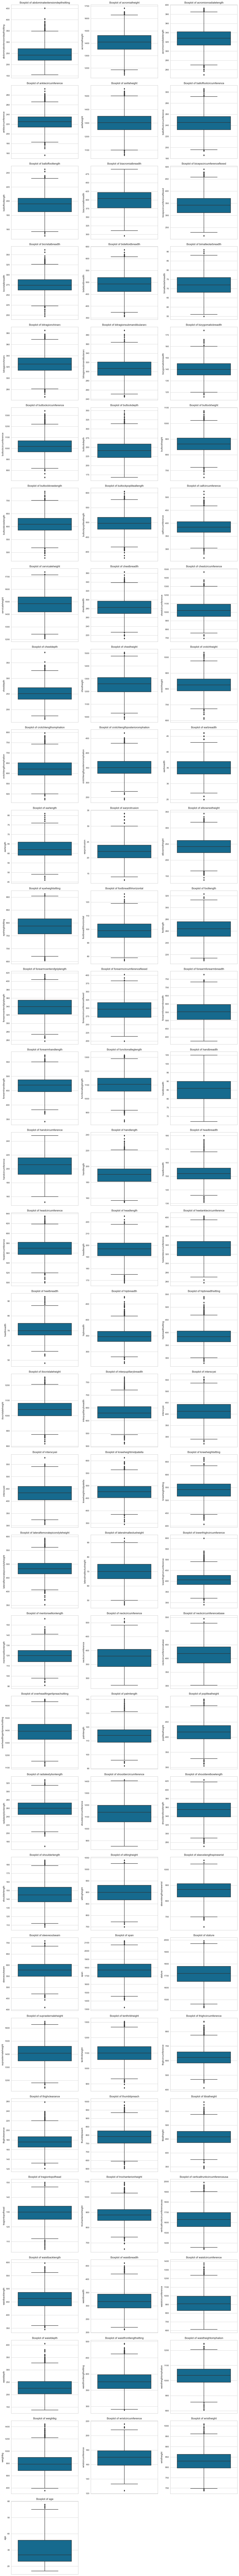

In [56]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**Conclusion about outliers: 
It is clear that there may be outliers by looking at the column boxplots. No special measures were done to address the outliers because the data represents real-world observations and models typically produce comparable findings even when outliers are left in place.**

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [57]:
df = df[(df["dodrace"] == "White") | (df["dodrace"] == "Black") | (df["dodrace"] == "Hispanic")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5569 entries, 0 to 5818
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5569 non-null   int64 
 1   acromialheight                  5569 non-null   int64 
 2   acromionradialelength           5569 non-null   int64 
 3   anklecircumference              5569 non-null   int64 
 4   axillaheight                    5569 non-null   int64 
 5   balloffootcircumference         5569 non-null   int64 
 6   balloffootlength                5569 non-null   int64 
 7   biacromialbreadth               5569 non-null   int64 
 8   bicepscircumferenceflexed       5569 non-null   int64 
 9   bicristalbreadth                5569 non-null   int64 
 10  bideltoidbreadth                5569 non-null   int64 
 11  bimalleolarbreadth              5569 non-null   int64 
 12  bitragionchinarc                5569 non-null   int64

In [58]:
df.dodrace.value_counts()  # inbalanced data, scaling must be done

dodrace
White       3703
Black       1228
Hispanic     638
Name: count, dtype: int64

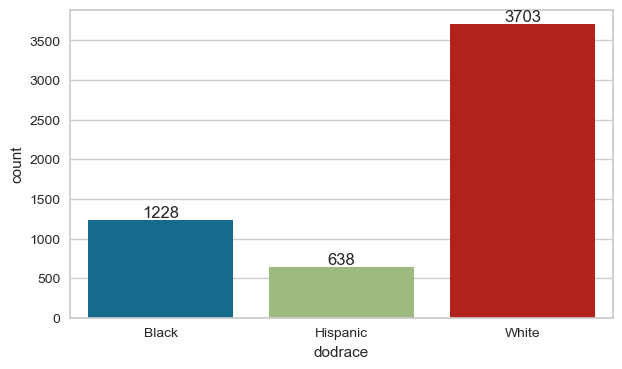

In [59]:
ax=sns.countplot(data=df, x="dodrace")  
ax.bar_label(ax.containers[0]);  
plt.show()

In [60]:
df.reset_index(drop=True, inplace=True)

In [61]:
df_corr = df.corr(numeric_only=True)
df_corr

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
abdominalextensiondepthsitting,1.000000,0.347279,0.307044,0.518431,0.276034,0.455912,0.328295,0.415343,0.691441,0.506213,0.724539,0.363583,0.530152,0.625786,0.518111,0.740130,0.841054,0.241164,0.473038,0.319789,0.659502,0.332682,0.627716,0.826434,0.778433,0.291697,0.182907,0.464340,0.198269,0.240132,0.405502,0.141628,0.266706,0.277092,0.438276,0.341575,0.343319,0.628189,0.728550,0.302974,0.411497,0.415427,0.455212,0.299111,0.360274,0.360522,0.324951,0.500835,0.437046,0.596429,0.557591,0.252213,0.256882,0.598352,0.540888,0.269582,0.343424,0.215256,0.344464,0.675434,0.290744,0.655330,0.625772,0.317343,0.308581,0.142668,0.276756,0.637546,0.281472,0.185762,0.271356,0.419030,0.270826,0.314380,0.303245,0.348500,0.289071,0.730657,0.725551,0.387252,0.255068,0.181130,0.226005,0.728885,0.569961,0.859576,0.940121,0.958955,0.580258,0.141303,0.824974,0.544987,0.380002,0.389661
acromialheight,0.347279,1.000000,0.866682,0.504933,0.987139,0.691948,0.797454,0.731399,0.518804,0.402670,0.624610,0.704528,0.567675,0.581868,0.506350,0.278606,0.336645,0.866065,0.809798,0.744536,0.408665,0.983931,0.541257,0.526865,0.277806,0.959096,0.899088,0.340041,0.409888,0.359623,0.445185,0.283706,0.298173,0.815497,0.670901,0.826522,0.845847,0.633521,0.569739,0.862726,0.893512,0.707092,0.716261,0.752958,0.408024,0.428910,0.545085,0.797816,0.446298,0.205293,0.099040,0.932108,0.339119,0.521771,0.587757,0.895416,0.931633,0.855672,0.676679,0.327458,0.539875,0.625971,0.650505,0.867215,0.708448,0.892737,0.821313,0.687158,0.888355,0.540160,0.823782,0.871419,0.878955,0.883702,0.979960,0.984672,0.944597,0.271863,0.440493,0.803296,0.890350,0.325447,0.883109,0.732887,0.727512,0.436370,0.401663,0.358508,0.609400,0.930737,0.674890,0.731848,0.921590,0.084727
acromionradialelength,0.307044,0.866682,1.000000,0.415483,0.855552,0.599469,0.724796,0.663556,0.446784,0.345108,0.554411,0.611975,0.515570,0.510356,0.453938,0.242877,0.285576,0.811512,0.772899,0.732211,0.353383,0.864214,0.464085,0.465823,0.263274,0.839808,0.848649,0.244963,0.305724,0.311136,0.375260,0.236928,-0.000675,0.640401,0.583302,0.747033,0.815027,0.552779,0.496920,0.834215,0.818292,0.619452,0.628863,0.717781,0.353872,0.384838,0.477256,0.706888,0.436298,0.180884,0.084287,0.857141,0.340104,0.461968,0.533865,0.828636,0.858845,0.810458,0.550770,0.284101,0.473296,0.541728,0.565077,0.789541,0.66264

In [62]:
corr_matrix = df.corr(numeric_only = True)

high_corr_columns = []

threshold = 0.9  

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value > threshold or corr_value < -threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_columns.append((col1, col2, corr_value))

print("Columns with High Correlation:")
for col1, col2, corr_value in high_corr_columns:
    print(f"{col1} and {col2} - Correlation Value: {corr_value:.2f}")

Columns with High Correlation:
axillaheight and acromialheight - Correlation Value: 0.99
buttockpopliteallength and buttockkneelength - Correlation Value: 0.95
cervicaleheight and acromialheight - Correlation Value: 0.98
cervicaleheight and axillaheight - Correlation Value: 0.98
chestheight and acromialheight - Correlation Value: 0.96
chestheight and axillaheight - Correlation Value: 0.96
chestheight and cervicaleheight - Correlation Value: 0.97
crotchheight and axillaheight - Correlation Value: 0.92
crotchheight and buttockheight - Correlation Value: 0.93
crotchheight and cervicaleheight - Correlation Value: 0.91
crotchheight and chestheight - Correlation Value: 0.90
footbreadthhorizontal and balloffootcircumference - Correlation Value: 0.92
footlength and balloffootlength - Correlation Value: 0.96
forearmcircumferenceflexed and bicepscircumferenceflexed - Correlation Value: 0.91
forearmforearmbreadth and bideltoidbreadth - Correlation Value: 0.93
forearmhandlength and forearmcenterof

# Data Prepare to Modelling

In [63]:
df.to_csv('ansur.csv', index=False)

In [123]:
X = df.drop(['dodrace'],axis=1)
y = df['dodrace']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [125]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4455, 97)
Train target shape   :  (4455,)
Test features shape  :  (1114, 97)
Test target shape    :  (1114,)


In [126]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

dodrace
White       0.664931
Black       0.220506
Hispanic    0.114563
Name: proportion, dtype: float64

dodrace
White       0.664871
Black       0.220426
Hispanic    0.114703
Name: proportion, dtype: float64

dodrace
White       0.665171
Black       0.220826
Hispanic    0.114004
Name: proportion, dtype: float64


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [127]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [128]:
df_object = X.select_dtypes(include ="object")
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())
# we see how many unique observations each feature consists of.

gender                        : 2
subjectsbirthlocation         : 62
writingpreference             : 3


In [129]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [130]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat), 
                         remainder=MinMaxScaler(), 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

## 1. Logistic model

### Vanilla Logistic Model

In [131]:
from sklearn.linear_model import LogisticRegression
operations = [("OneHot_Encoder", column_trans), 
              ("logistic", LogisticRegression(class_weight = 'balanced',
                                              random_state = 42))]

logistic_model = Pipeline(steps=operations) #.set_output(transform="pandas")

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=42))])

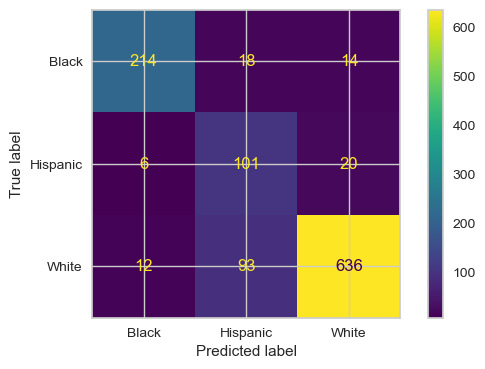

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test);

In [138]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[214  18  14]
 [  6 101  20]
 [ 12  93 636]]
              precision    recall  f1-score   support

       Black       0.92      0.87      0.90       246
    Hispanic       0.48      0.80      0.60       127
       White       0.95      0.86      0.90       741

    accuracy                           0.85      1114
   macro avg       0.78      0.84      0.80      1114
weighted avg       0.89      0.85      0.87      1114


Train_Set
[[ 920   35   27]
 [  20  431   60]
 [  66  358 2538]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       982
    Hispanic       0.52      0.84      0.65       511
       White       0.97      0.86      0.91      2962

    accuracy                           0.87      4455
   macro avg       0.80      0.88      0.83      4455
weighted avg       0.90      0.87      0.88      4455



In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_train)

precision = precision_score(y_train, y_pred, average='macro')
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")

Precision: 0.8014761059165121, Recall: 0.8790537493914022, F1: 0.8265946268547485


In [141]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score,auc

f1_Hispanic = make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])


scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}


scores = cross_validate(logistic_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.600802
train_f1_Hispanic           0.647454
test_precision_Hispanic     0.489947
train_precision_Hispanic    0.526072
test_recall_Hispanic        0.778808
train_recall_Hispanic       0.841703
dtype: float64

**Neden NaN degerler döndügünü anlayamadim, asagida scoring icin farkli metrikler deneyince sonuc aldim, daha sonra Orion hoca yukaridaki gibi örnek gönderdi ve cözüldü**


In [142]:

#from sklearn.model_selection import cross_validate, StratifiedKFold

#operations = [("OneHot_Encoder", column_trans),
              ("logistic", LogisticRegression(class_weight='balanced', random_state=42))]

# Create the pipeline
#model = Pipeline(steps=operations)

# Define the scoring metrics
#scoring = {
 #   'precision_Hispanic': 'precision_macro',
  #  'recall_Hispanic': 'recall_macro',
   # 'f1_Hispanic': 'f1_macro'
#}

# Use StratifiedKFold for consistent class distribution across folds
#cv = StratifiedKFold(n_splits=10)

# Perform cross-validation
#scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, return_train_score=True)

# Create a DataFrame from the scores
#df_scores = pd.DataFrame(scores, index=range(1, 11))
#df_scores.mean()[2:]

IndentationError: unexpected indent (2122193322.py, line 4)

### Logistic Model GridsearchCV

In [109]:
precision_hispanic =  make_scorer(precision_score, average=None, labels=["Hispanic"])

In [110]:
param_grid = {
    "logistic__C": [0.3, 0.4, 0.5], 
    'logistic__penalty': ["l1", "l2"],
    'logistic__solver': ['liblinear', 'lbfgs'],
}

In [111]:
operations = [("OneHot_Encoder", column_trans), 
              ("logistic", LogisticRegression(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=precision_hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [112]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.3, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', average=None, labels=['Hispanic']))

In [113]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=0.3, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

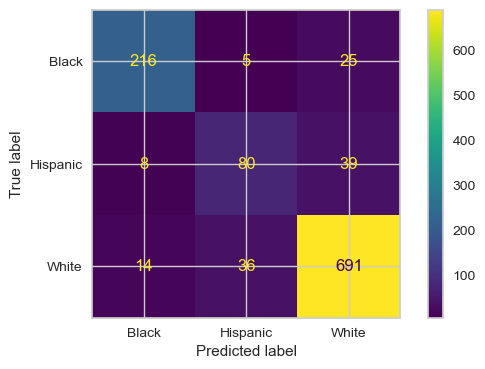

In [116]:
ConfusionMatrixDisplay.from_estimator(log_model_grid, X_test, y_test);

In [117]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[216   5  25]
 [  8  80  39]
 [ 14  36 691]]
              precision    recall  f1-score   support

       Black       0.91      0.88      0.89       246
    Hispanic       0.66      0.63      0.65       127
       White       0.92      0.93      0.92       741

    accuracy                           0.89      1114
   macro avg       0.83      0.81      0.82      1114
weighted avg       0.88      0.89      0.89      1114


Train_Set
[[ 901   17   64]
 [  30  335  146]
 [  59  123 2780]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       982
    Hispanic       0.71      0.66      0.68       511
       White       0.93      0.94      0.93      2962

    accuracy                           0.90      4455
   macro avg       0.85      0.84      0.84      4455
weighted avg       0.90      0.90      0.90      4455



In [118]:
operations = [("OneHot_Encoder", column_trans), 
              ("logistic", LogisticRegression(class_weight = 'balanced', C = 0.4, solver = "liblinear",
                                              penalty = 'l1',
                                              random_state = 42))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.647335
train_f1_Hispanic           0.680166
test_precision_Hispanic     0.674095
train_precision_Hispanic    0.701740
test_recall_Hispanic        0.626207
train_recall_Hispanic       0.659923
dtype: float64

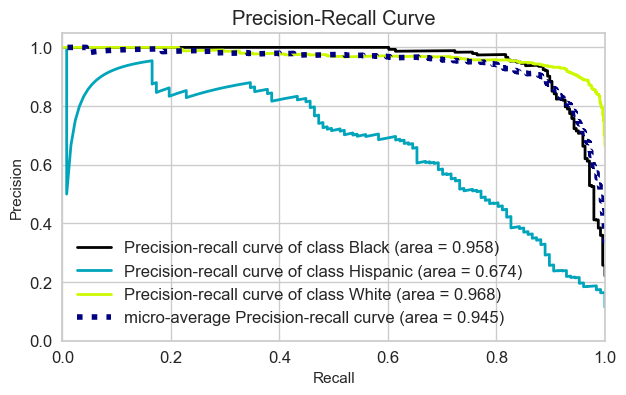

In [119]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHot_Encoder", column_trans), 
              ("logistic", LogisticRegression(class_weight = 'balanced', C = 0.4, solver = "liblinear",
                                              penalty = 'l1',
                                              random_state = 42))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [120]:
pd.get_dummies(y_test).values

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True],
       ...,
       [False,  True, False],
       [False, False,  True],
       [False,  True, False]])

In [121]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.673620246214365

In [122]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [123]:
from sklearn.svm import SVC
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]

svc_model = Pipeline(steps=operations) #.set_output(transform="pandas")

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [124]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[217  14  15]
 [  6 101  20]
 [ 15 107 619]]
              precision    recall  f1-score   support

       Black       0.91      0.88      0.90       246
    Hispanic       0.45      0.80      0.58       127
       White       0.95      0.84      0.89       741

    accuracy                           0.84      1114
   macro avg       0.77      0.84      0.79      1114
weighted avg       0.88      0.84      0.85      1114


Train_Set
[[ 921   28   33]
 [  18  431   62]
 [  57  376 2529]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       982
    Hispanic       0.52      0.84      0.64       511
       White       0.96      0.85      0.91      2962

    accuracy                           0.87      4455
   macro avg       0.80      0.88      0.83      4455
weighted avg       0.90      0.87      0.88      4455



In [125]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        n_jobs = -1, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.574736
train_f1_Hispanic           0.640464
test_precision_Hispanic     0.461921
train_precision_Hispanic    0.515942
test_recall_Hispanic        0.763047
train_recall_Hispanic       0.844312
dtype: float64

###  SVC Model GridsearchCV

In [126]:
precision_hispanic =  make_scorer(precision_score, average=None, labels=["Hispanic"])

In [131]:
param_grid = {
    'svc__C': [0.2, 0.3],
    'svc__gamma': ["scale", "auto", 0.01], 
    'svc__kernel':['linear', 'rbf'] 
} 

In [132]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=precision_hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [133]:
svc_model.get_params()

{'memory': None,
 'steps': [('OneHot_Encoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('svc', SVC(class_weight='balanced', random_state=42))],
 'verbose': False,
 'OneHot_Encoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                   verbose_feature_names_out=False),
 'svc': SVC(class_weight='

In [134]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.2, 0.3],
                         'svc__gamma': ['scale', 'auto', 0.01],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', average=None, labels=['Hispanic']))

In [135]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=0.2, class_weight='balanced', kernel='linear',
                     random_state=42))])

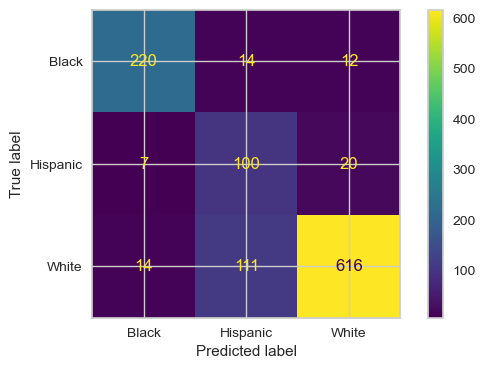

In [137]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

In [138]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[220  14  12]
 [  7 100  20]
 [ 14 111 616]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       246
    Hispanic       0.44      0.79      0.57       127
       White       0.95      0.83      0.89       741

    accuracy                           0.84      1114
   macro avg       0.77      0.84      0.79      1114
weighted avg       0.88      0.84      0.85      1114


Train_Set
[[ 911   37   34]
 [  23  420   68]
 [  65  391 2506]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       982
    Hispanic       0.50      0.82      0.62       511
       White       0.96      0.85      0.90      2962

    accuracy                           0.86      4455
   macro avg       0.79      0.87      0.81      4455
weighted avg       0.90      0.86      0.87      4455



In [139]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced', kernel = 'linear',
                                              C = 0.3,
                                              random_state = 42))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.584826
train_f1_Hispanic           0.626673
test_precision_Hispanic     0.469384
train_precision_Hispanic    0.504451
test_recall_Hispanic        0.778658
train_recall_Hispanic       0.827133
dtype: float64

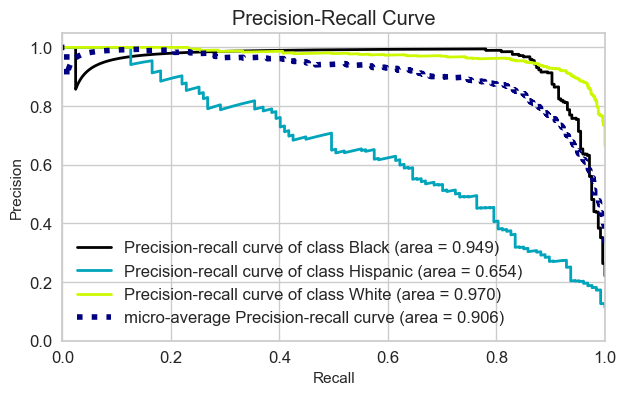

In [140]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced', kernel = 'linear',
                                              C = 0.3,
                                              random_state = 42))]


model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test) # should not use predict_proba  . should use decision func.
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [141]:
decision_function

array([[ 2.26368857, -0.25520473,  0.88600474],
       [-0.26011797,  2.23546937,  1.1780555 ],
       [-0.27256473,  1.20120493,  2.24921115],
       ...,
       [-0.18013646,  2.19181302,  0.9492663 ],
       [-0.26316101,  2.26616654,  0.94156745],
       [-0.22728922,  2.2493301 ,  0.84933956]])

In [142]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6535187053069241

In [143]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___